# Task 2: Data Preprocessing
## Handle missing values and outliers.
- Handlling Missing Values

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

- Importing necessary data 

In [26]:


filepath = "C:/Users/puskar/github-classroom/Omdena-NIC-Nepal/machine-learning-linear-regression-ai-nic-nepal/data/HousingData.csv"

boston_df= pd.read_csv(filepath)

In [27]:
# Replacing CHAS null values with the mode (high frequency value)
mode_value = boston_df['CHAS'].mode()[0]
boston_df['CHAS'].fillna(mode_value, inplace=True)

In [28]:
columns = ['CRIM', 'ZN', 'INDUS','CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT','MEDV']
# replacing CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT' N/A values with their respective median values
for column in columns:
    median_value = boston_df[column].median()
    boston_df[column].fillna(median_value, inplace=True)


In [29]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43,36.2


### Using IQR method to handle outliers
#### The steps involved in outlier detection using the IQR method are as follows: 

- Calculate the first quartile (Q1) and third quartile (Q3) of the dataset. 
- Compute the interquartile range (IQR) as the difference between Q3 and Q1 (IQR = Q3 – Q1). 
- Define the lower outlier threshold as Q1 – (1.5 * IQR) and the upper outlier threshold as Q3 + (1.5 * IQR). 
- Identify any data points that fall below the lower threshold or above the upper threshold. These observations are considered outliers. 
- Any value below the lower threshold is replaced with the lower threshold value.
- Any value above the upper threshold is replaced with the upper threshold value.

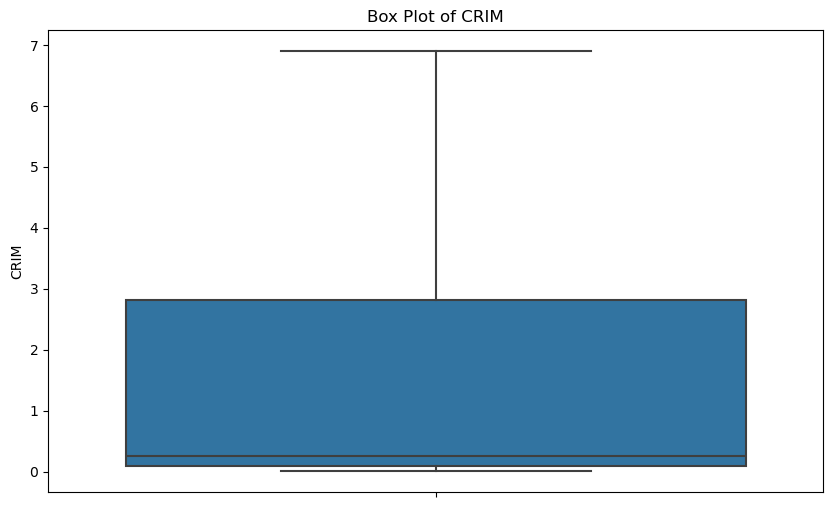

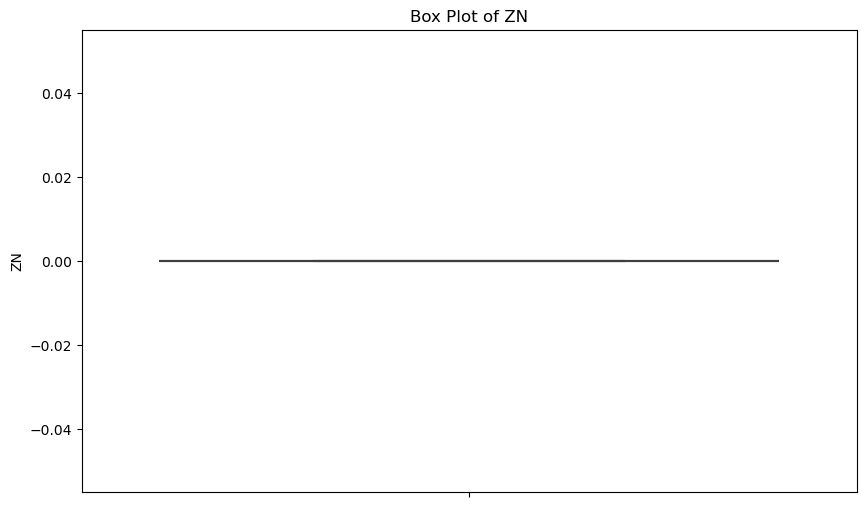

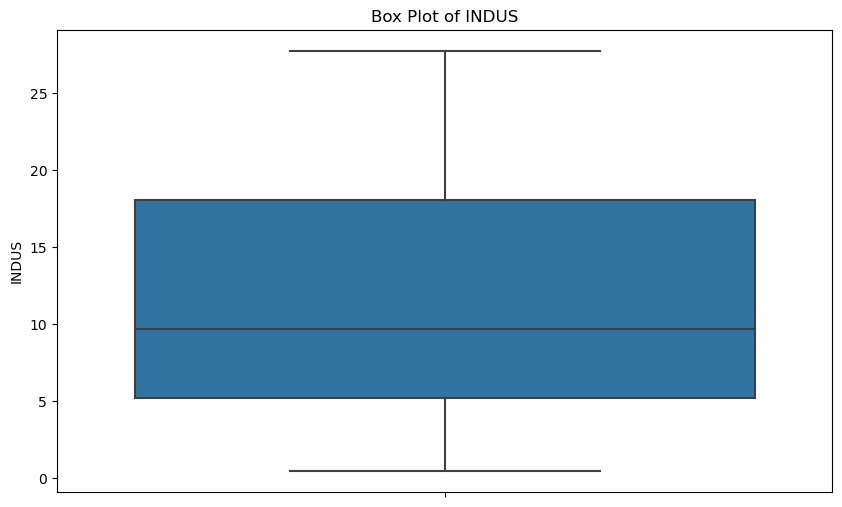

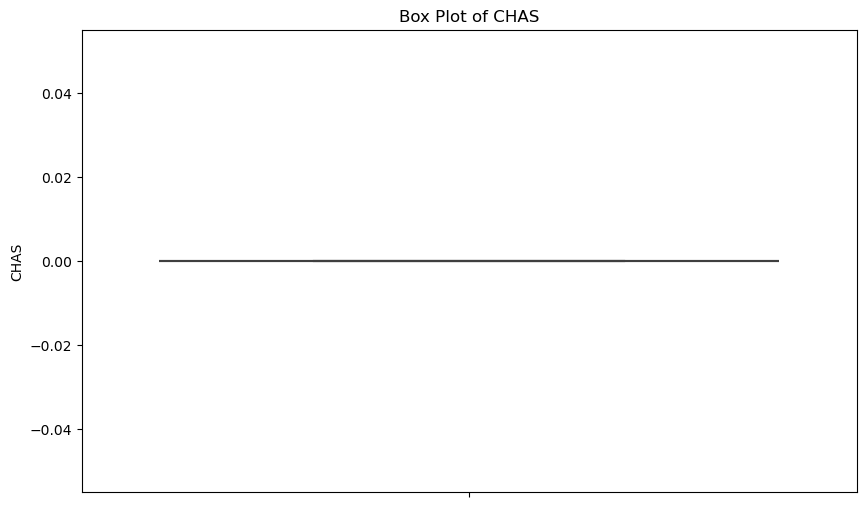

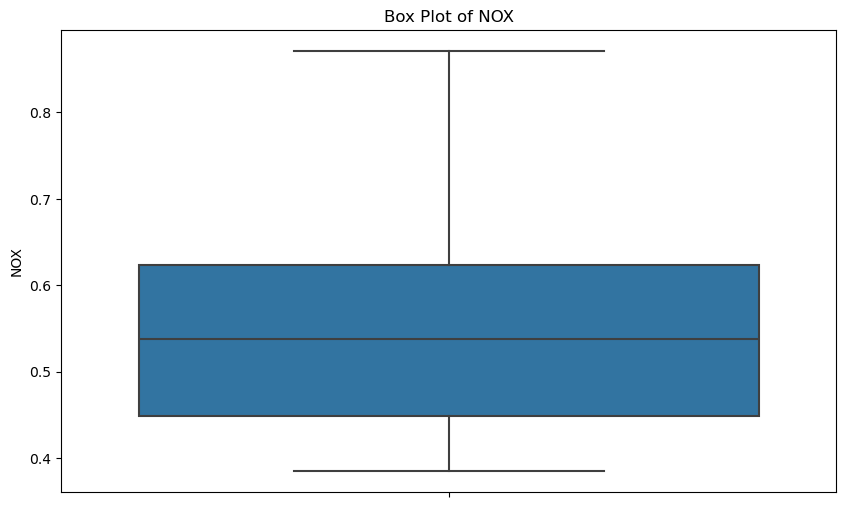

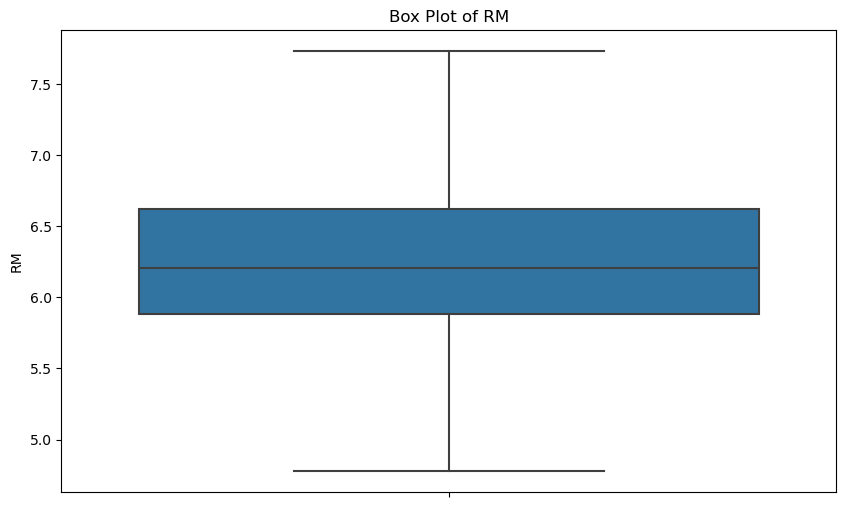

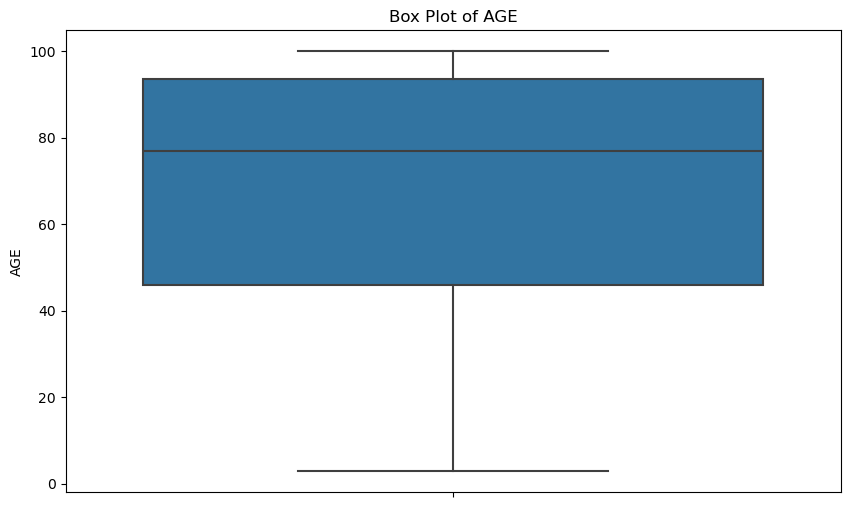

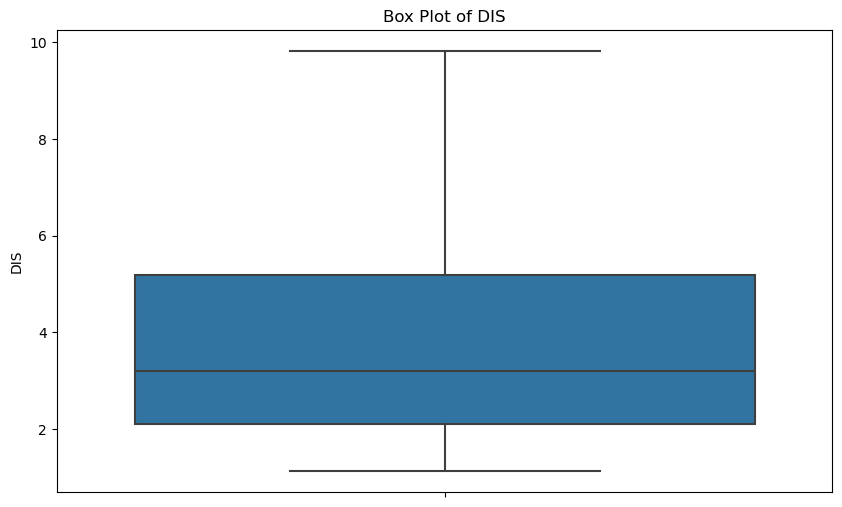

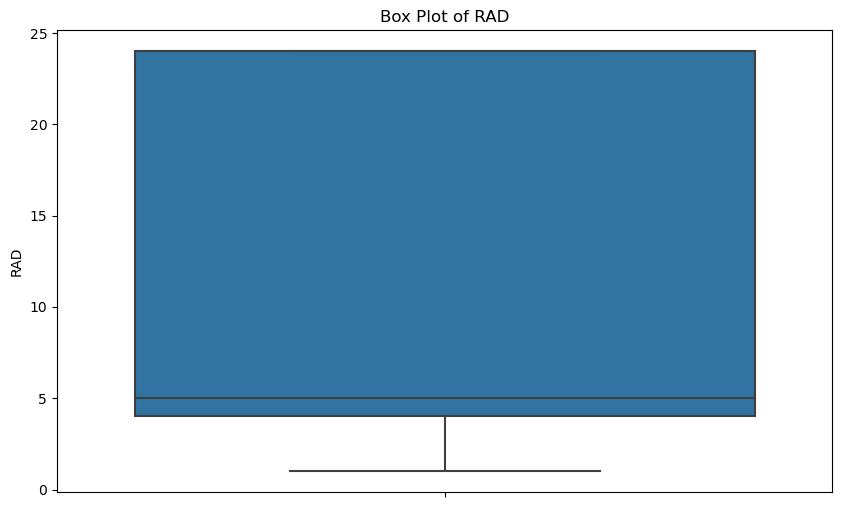

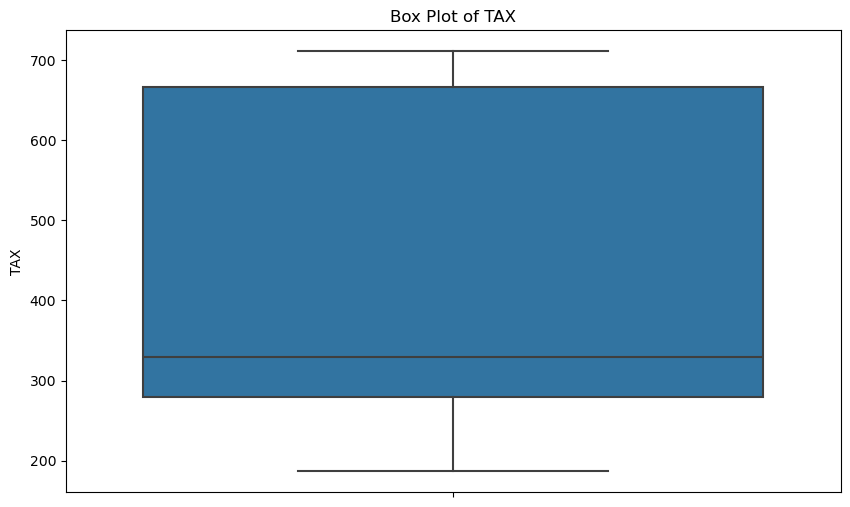

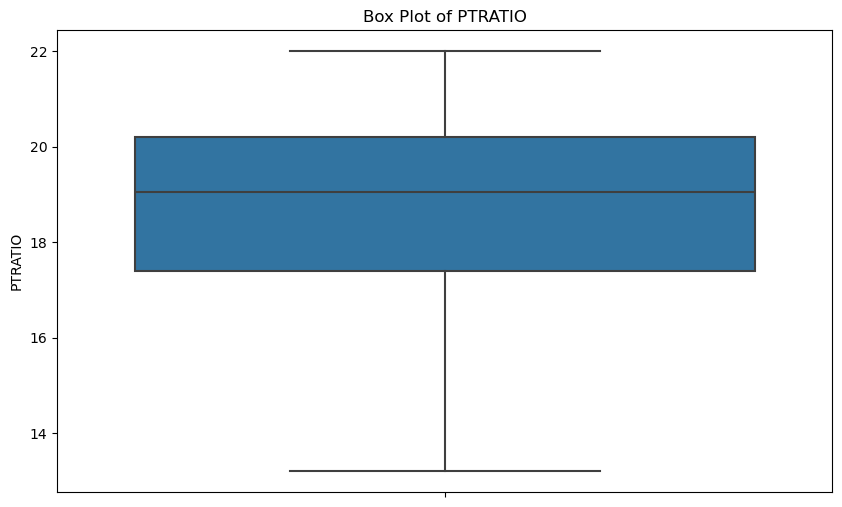

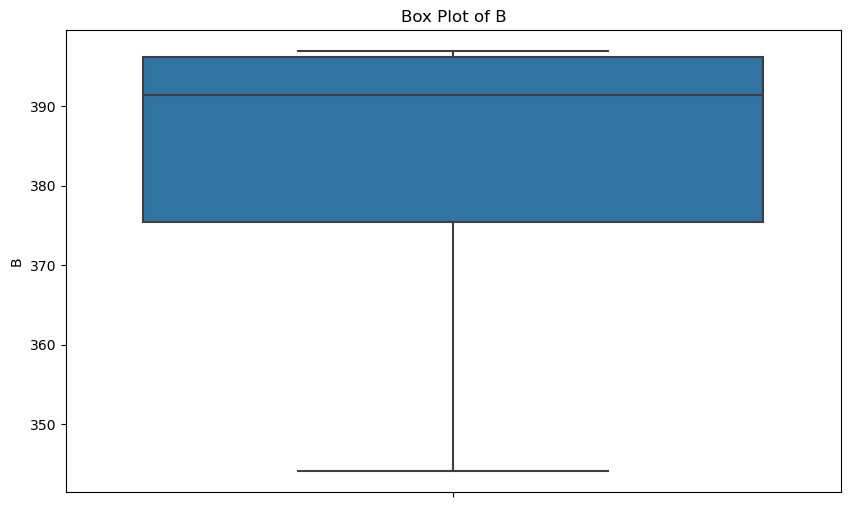

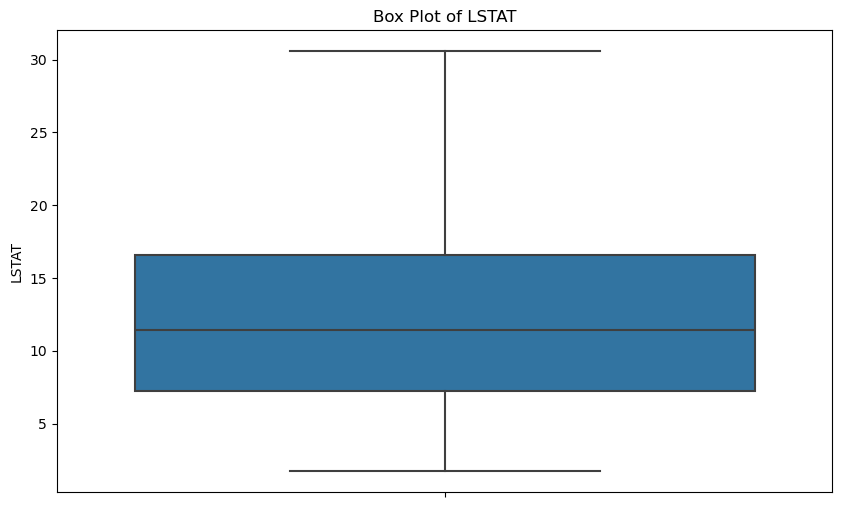

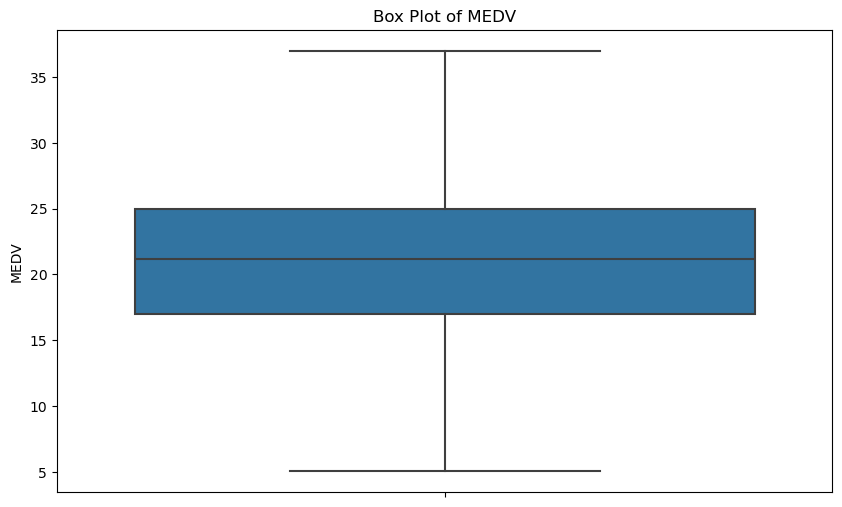

In [30]:
for column in columns:
    Q1 = boston_df[column].quantile(0.25)
    Q3 = boston_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
     # Clip values outside the bounds
    boston_df[column] = boston_df[column].clip(lower=lower_bound, upper=upper_bound)
    #Box plots to identify outliers in numerical features
for feature in columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=boston_df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

## Encode categorical variables.
- Convert Categories to Integers: LabelEncoder takes a list of categories and assigns an integer to each unique category. For example, if you have a categorical feature with values ["red", "green", "blue"], LabelEncoder might encode these as [0, 1, 2].

In [31]:
# finding categorical columns
categorical_cols = boston_df.select_dtypes(include=['object']).columns 
categorical_cols

Index([], dtype='object')

- No Categorical Variables: We don't have any columns with string or non-numeric values. Therefore, there's no need for encoding steps specifically designed for converting categorical data to numerical format.

## Normalize/standardize numerical features.

- finding numerical columns thats going to be normalized

In [32]:

numerical_columns = boston_df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

- Standarize columns having numerical values

In [33]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [34]:
boston_standardized = boston_df.copy()
boston_standardized[numerical_columns] = scaler.fit_transform(boston_df[numerical_columns])
boston_standardized.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.688167,0.0,-1.301706,0.0,-0.144217,0.475982,-0.132771,0.148015,-0.982843,-0.666608,-1.477181,0.786988,-1.116310,0.279499
1,-0.680160,0.0,-0.591052,0.0,-0.740262,0.231390,0.366141,0.572202,-0.867883,-0.987329,-0.309941,0.786988,-0.507148,-0.036479
2,-0.680167,0.0,-0.591052,0.0,-0.740262,1.444822,-0.282080,0.572202,-0.867883,-0.987329,-0.309941,0.573183,-1.255422,1.688236
3,-0.678229,0.0,-1.321115,0.0,-0.835284,1.147817,-0.839258,1.101820,-0.752922,-1.106115,0.110265,0.667741,-1.415034,1.517081
4,-0.664236,0.0,-1.321115,0.0,-0.835284,1.384468,-0.533356,1.101820,-0.752922,-1.106115,0.110265,0.786988,-0.171816,1.885722


- Normalizing columns having numerical values

In [35]:
# Normalization
normalizer = MinMaxScaler()
boston_normalized = boston_df.copy()
boston_normalized[numerical_columns] = normalizer.fit_transform(boston_df[numerical_columns])
boston_normalized[numerical_columns]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.0,0.067815,0.0,0.314815,0.608570,0.641607,0.340620,0.000000,0.208015,0.238636,1.000000,0.112652,0.593652
1,0.003046,0.0,0.242302,0.0,0.172840,0.556402,0.782698,0.441539,0.043478,0.104962,0.522727,1.000000,0.256846,0.518417
2,0.003043,0.0,0.242302,0.0,0.172840,0.815210,0.599382,0.441539,0.043478,0.104962,0.522727,0.922908,0.079723,0.929075
3,0.003780,0.0,0.063050,0.0,0.150206,0.751863,0.441813,0.567540,0.086957,0.066794,0.625000,0.957002,0.041941,0.888323
4,0.009104,0.0,0.063050,0.0,0.150206,0.802337,0.528321,0.567540,0.086957,0.066794,0.625000,1.000000,0.336222,0.976097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.008172,0.0,0.420455,0.0,0.386831,0.614668,0.681771,0.155214,0.000000,0.164122,0.886364,0.906997,0.336222,0.543495
502,0.005653,0.0,0.420455,0.0,0.386831,0.454438,0.760041,0.133227,0.000000,0.164122,0.886364,1.000000,0.254766,0.487069
503,0.007901,0.0,0.420455,0.0,0.386831,0.744411,0.907312,0.119420,0.000000,0.164122,0.886364,1.000000,0.135529,0.590517
504,0.014987,0.0,0.420455,0.0,0.386831,0.682757,0.889804,0.144894,0.000000,0.164122,0.886364,0.934651,0.164645,0.530956


## Split the data into training and testing sets.

In [40]:

# Splitting the dataset into features (X) and target (y)
X = boston_normalized.drop('MEDV', axis=1)  # Assuming 'MEDV' is the target variable
y = boston_normalized['MEDV']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)